In [2]:
import hfst_dev as hfst
import graphviz


Define the following sets as finite state transducers in Python.

1. The set P1 of strings of a's and b's that include at least one a and at least one b.

In [3]:
# P1_a is the language of all strings that contain at least one 'a'
P1_a = hfst.regex('[?* a ?*]')

# ?* means zero or more of anything

# P1_b is the language of all strings that contain at least one 'b'
P1_b = hfst.regex('[?* b ?*]')

# P1 is the intersection of P1_a and P1_b
P1 = P1_a
P1.intersect(P1_b)

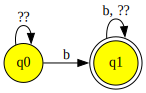

In [4]:
P1_b.view()

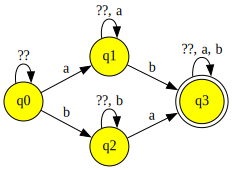

In [5]:
P1.view()

2. The set P2 of strings of a's and b's that have a length divisible by three. Include the
empty string.

In [6]:
# P2 is the language of all strings that contain at least three 'a's or 'b's
# ^ means repeat n times
# * means zero or more of anything
# a|b means a or b
# () means the union of the language and the empty string

P2 = hfst.regex('([a|b]^3*)')

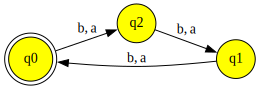

In [7]:
P2.view()

3. The relation R3 that has a string of a's and b's on the upper side, and on the lower
side has a string of the same length, with b substituted for a, and a substituted for
b.

Hint: see page 135 of Beesley and Karttunen.

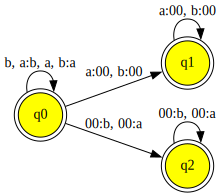

In [8]:
# replace rule A->B

# R3 has a string of a's and b's on the upperside 
# and a changed string of a's and b's on the lower side

# R3 = { (x, y) | x, y ∈ {a, b}* , |x| = |y|, y = x[a->b][b->a] }

# P3_base is the language of all strings of 'a' or 'b'
# 

# the rule of a->b and b->a is applied to the string
cap0 = hfst.regex("a->b , b->a")
cap = cap0.copy()
cap.repeat_plus()
cap.minimize()

# X3 is the relation of two strings of 'a' or 'b' of the same length
X3 = hfst.regex('[[a|b]*] : [[a|b]*]')
# X3.view()
R3 = X3.copy()
R3.compose(cap)
R3.view()

In [9]:
import random
istream = hfst.HfstInputStream('./English')
istream.is_good()
English = istream.read()
istream.close()

def sample_input(x,n=8,cycles=3):
        x2 = x.copy()
        x2.input_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))
def sample_output(x,n=8,cycles=3):
        x2 = x.copy()
        x2.output_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))

4. Define a machine P4 for the orthographic forms of words that on the phonetic side
begin with K and end with K.

In [10]:
# on the phonetic side so English.l
defs = {'English':English}
expr = '[English .o. [K ?* K]].u'
P4 = hfst.regex(expr, definitions=defs)
sample_input(P4)

['klap|pe|rich',
 'kol|k',
 'cusic|k',
 'keepsake',
 'capitalistic',
 'crank',
 'kaspe|rek',
 'compute|rlike']

5. Define a machine P5 for the orthographic forms of words that on the phonetic side
consist purely of vowels and nasals.

Use definitions from phoneclass.fst.  You probably won't be able to import this directly, restate the definitions.

Illustrate by sampling.

In [11]:
Nasals = hfst.regex("N| M| NG")
Vowels = hfst.regex("AH0| IH0| ER0| IY0| OW0| AA0| EH0| UW0| AE0| AO0| AY0| EY0| AW0| UH0| OY0\
                    EH1| AE1| AA1| IH1| IY1| EY1| OW1| AO1| AY1| AH1| UW1| ER1| AW1| UH1| OY1\
                    EH2| EY2| AE2| AY2| AA2| IH2| OW2| IY2| AO2| UW2| AH2| AW2| ER2| UH2| OY2")
defs = {"N":Nasals,"V":Vowels, 'English':English}

In [12]:
expr = '[English .o. [[N|V]*]].u'
P5 = hfst.regex(expr, definitions=defs)
sample_input(P5)

['oney', 'noaa', 'num|mi', 'uh', 'ai', 'mein', 'a|inu', 'an|no']

6. Define a machine P6 for the phonetic forms of two-syllable words that have the main stress
coming first.  Use definitions from phoneclass.fst for the stress classes.

Illustrate by sampling.

In [13]:
Vow0 = hfst.regex("[AH0| IH0| ER0| IY0| OW0| AA0| EH0| UW0| AE0| AO0| AY0| EY0| AW0| UH0| OY0]")
Vow1 = hfst.regex("[EH1| AE1| AA1| IH1| IY1| EY1| OW1| AO1| AY1| AH1| UW1| ER1| AW1| UH1| OY1]")
Vow2 = hfst.regex("[EH2| EY2| AE2| AY2| AA2| IH2| OW2| IY2| AO2| UW2| AH2| AW2| ER2| UH2| OY2]")
Cons = hfst.regex("[R| W| Y \
                  | N| M| NG \
                  | S| L| T| K| D| Z| B| P| F| G| V| HH| SH| JH| CH| TH| DH| ZH]")
defs6 = {"V0":Vow0,"V1":Vow1, "V2":Vow2, "C":Cons,  'English':English}

In [27]:
# expr = '[English .o. [[C* V0 C* V1 C*] | [C* V0 C* V2 C*]| [C* V1 C* V2 C*] ]]'
expr = '[English .o. [[C* V1 C* V0 C*] | [C* V2 C* V0 C*]| [C* V2 C* V1 C*] ]]'
P6 = hfst.regex(expr, definitions=defs6)
sample_input(P6)

['but|try',
 'wo|odsmen',
 'anglo',
 'gros|skop|f',
 'flut|te|r',
 'swon|ge|r',
 'vil|lie|rs',
 'homely']